# Principle Component Analysis with Python

### Importing the libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
import os
os.getcwd()

'C:\\Users\\HEMANT'

### Importing the dataset

In [37]:
# importing or loading the dataset
dataset=pd.read_csv('wine.csv')

# distributing the dataset into two components X and Y
X=dataset.iloc[:,0:13].values
Y=dataset.iloc[:,13].values

In [38]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### spliting the dataset into the training set and test set

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

### Feature Scalling

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Applying PCA function

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

### Fitting Logistic Regression to the training set

In [31]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

### Predicting the test set result using function under LogisticRegression

In [32]:
Y_pred=classifier.predict(X_test)

### Making the Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[10,  2,  0],
       [ 0,  9,  0],
       [ 0,  0, 15]], dtype=int64)

### Predicting Training set result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


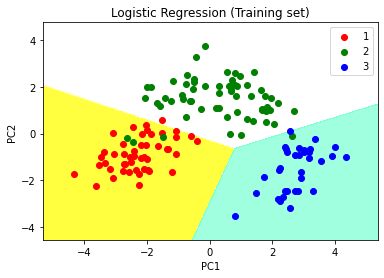

In [35]:
# predicting the training set result through scatter plot
from matplotlib.colors import ListedColormap

X_set,Y_set=X_train,Y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,
                  stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,
                  stop=X_set[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),
          X2.ravel()]).T).reshape(X1.shape),alpha=0.75,
          cmap=ListedColormap(('yellow','white','aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1],
               c=ListedColormap(('red','green','blue'))(i),label=j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')  # For Xlabel
plt.ylabel('PC2')  # For Ylabel
plt.legend()       # to show legend

# show scatter plot
plt.show()

### Visualizing the test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


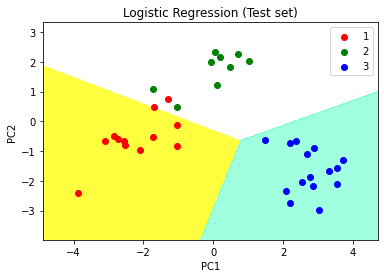

In [36]:
# Visualize the test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set,Y_set=X_test,Y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,
                  stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,
                  stop=X_set[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),
          X2.ravel()]).T).reshape(X1.shape),alpha=0.75,
          cmap=ListedColormap(('yellow','white','aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1],
               c=ListedColormap(('red','green','blue'))(i),label=j)
    
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')  # For Xlabel
plt.ylabel('PC2')  # For Ylabel
plt.legend()       # to show legend

# show scatter plot
plt.show()
